### Simple Linear Regression

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [68]:
df = pd.read_csv("weight-height.csv")

In [70]:
df

,Weight,Height
0,241.893563,73.847017
1,162.310473,68.781904
2,212.740856,74.110105
3,220.042470,71.730978
4,206.349801,69.881796
...,...,...
9995,136.777454,66.172652
9996,170.867906,67.067155
9997,128.475319,63.867992
9998,163.852461,69.034243


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  10000 non-null  float64
 1   Height  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


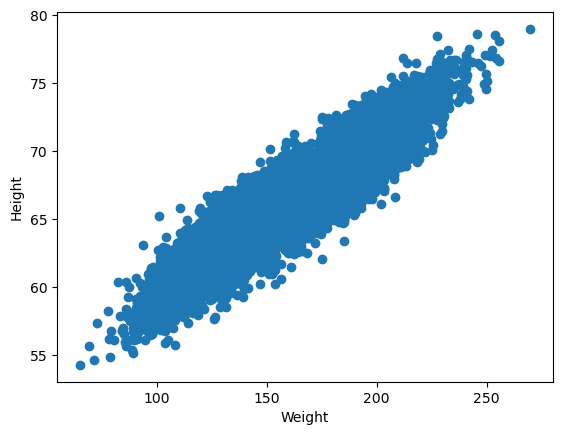

In [74]:
# Scatter Plot

plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [76]:
# Check correlation
df.corr()

,Weight,Height
Weight,1.000000,0.924756
Height,0.924756,1.000000


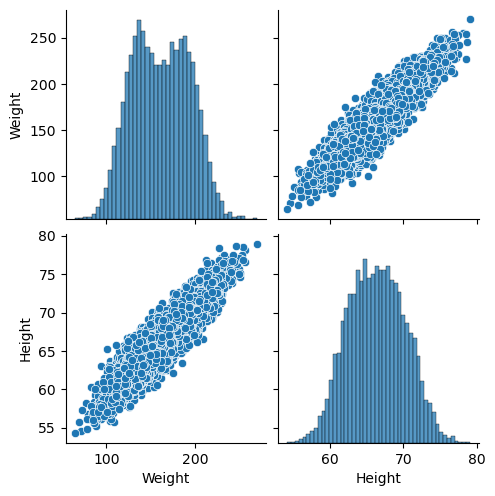

In [78]:
sns.pairplot(df)
plt.show()

In [79]:
# Create Independent and dependent Features

X = df[['Weight']]      # Keep the independent features in a Dataframe or 2-D Array
y = df['Height']        # Keep the dependent feature in a Series or 1-D Array

In [82]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [84]:
# Now we do Standardization
# Standardization is done to make the mean=0 and standard-deviation=1. Internally it does it with the help of z-score statistics

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [86]:
X_train

array([[-0.04659659],
       [ 1.34251968],
       [-0.34628208],
       ...,
       [-0.13835268],
       [ 0.56699643],
       [-0.33884025]])

In [88]:
X_test = scaler.transform(X_test)

# We are using only transform because we want the test data to take the same value of mean and standard-deviaiton as of Training Data.
# If we do fit_trasform in the test data it will calculate the mean and standard deviation separately that may lead to data leakage which is not recommended. 

In [90]:
X_test

array([[ 0.37115893],
       [ 1.05964173],
       [ 0.28064585],
       ...,
       [-1.16697743],
       [ 0.1278561 ],
       [ 0.05862451]])

In [92]:
# Apply Simple Linear Regression
regression = LinearRegression(n_jobs=-1)

In [94]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [96]:
print(f"Coefficient/Slope of the straight line = {regression.coef_}")

# This means that a single unit movement in Weight value resutls in 3.55 units movement in the Height value.

Coefficient/Slope of the straight line = [3.5520765]


In [98]:
print(f"Intercept of the straight line = {regression.intercept_}")

Intercept of the straight line = 66.34834766153067


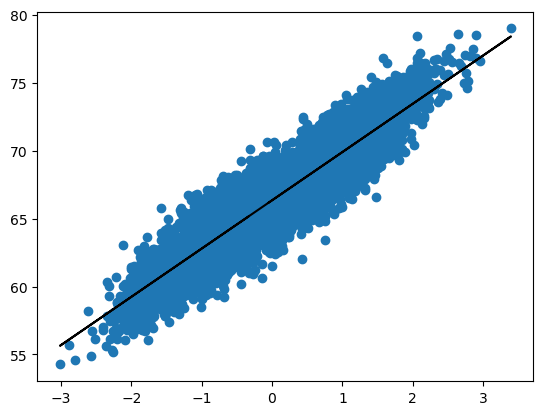

In [100]:
# Plot best fit line for the training data.

plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color='black')
plt.show()

### Precision for the test data
1. predicted height output = intercept + coef_(X_test)
2. y_pred = 66.34834766153067 + (3.5520765 * X_test)

In [103]:
# Prediction for the test data

y_pred = regression.predict(X_test)

In [105]:
# Performance Metrics

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [107]:
print(f"MSE :  {mse}")
print(f"MAE :  {mae}")
print(f"RMSE:  {rmse}")

MSE :  2.124500293607796
MAE :  1.1618686242313918
RMSE:  1.4575665657553332


In [109]:
# Calculate r-square

score = r2_score(y_test, y_pred)
print(score)

0.8574288810712687


### OLS Linear Regression

In [112]:
import statsmodels.api as sm

In [113]:
model = sm.OLS(y_train, X_train).fit()

In [116]:
prediction = model.predict(X_test)

In [118]:
print(prediction)

[ 1.3183849   3.7639285   0.99687554 ... -4.1451931   0.45415466
  0.20823876]


In [120]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.48
Date:                Wed, 30 Apr 2025   Prob (F-statistic):                    3.63e-06
Time:                        18:42:36   Log-Likelihood:                         -42106.
No. Observations:                7500   AIC:                                  8.421e+04
Df Residuals:                    7499   BIC:                                  8.422e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [122]:
# Prediction for new data

regression.predict(scaler.transform([[162]]))

D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([66.43367798])